In [2]:
# Questions:
# What happens if we try to predict a new game and its from a new publisher? 
# Then the new data doesn't have the same columns? we would have to transform the new data from whatever it is
# into the same layout as our training data, or our model wouldn't work.

In [3]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
data= pd.read_csv('vgsales.csv')

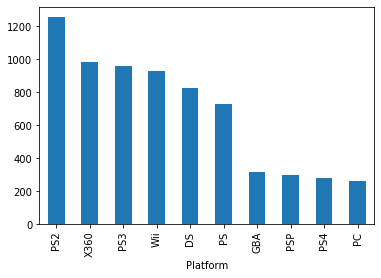

In [5]:
# plot platform by year, top 10
data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind="bar")

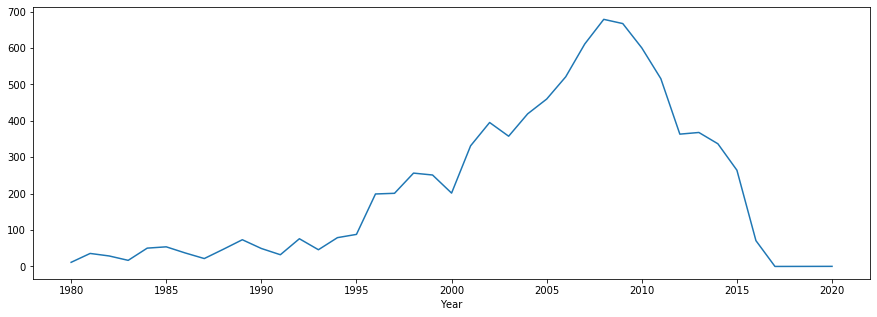

In [6]:
# plot sales by year
data.groupby('Year')['Global_Sales'].sum().plot(figsize=(15,5))

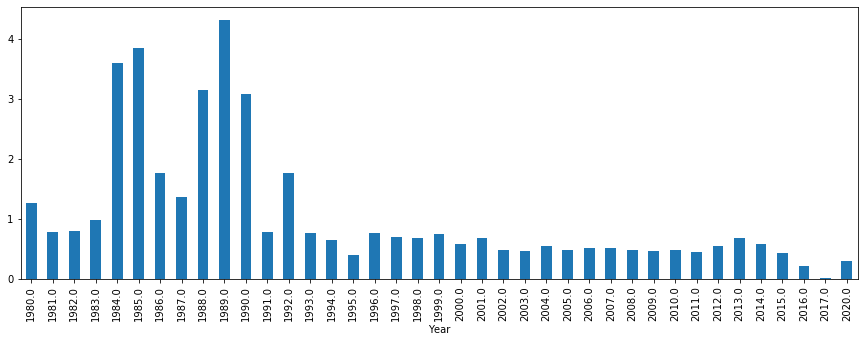

In [7]:
# Average sales per year
df = pd.DataFrame(data.groupby('Year')['Global_Sales'].sum())
(data.groupby('Year')['Global_Sales'].sum() / data.groupby('Year').count()['Rank']).plot(figsize=(15,5), kind="bar")

In [8]:
# Clean the data
# deal with outliers first
clean_data = data[data['Global_Sales'] > .1]
clean_data = clean_data[clean_data['Global_Sales'] < 40]
labels = clean_data['Global_Sales']
clean_data = clean_data.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Name', 'Rank','Global_Sales'])
clean_data = pd.get_dummies(clean_data, columns=['Platform', 'Year', 'Genre', 'Publisher'])

X_train, X_test, y_train, y_test = train_test_split(clean_data, labels, random_state=42)

In [9]:
# comparing alpha values for funsies.
model = Ridge()
model10 = Ridge(alpha=10)
model.fit(X_train, y_train)
model10.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [10]:
# evaluate a model
mean_squared_error(model.predict(X_test), y_test)

3.284486404149683

In [11]:
# evaluate a model
mean_squared_error(model10.predict(X_test), y_test)

3.2695335355863766

In [12]:
model.score(X_test, y_test)

0.12004962207630467

In [13]:
model10.score(X_test, y_test)

0.12405566159794822

In [ ]:
# Well that's a pretty bad score